Im Folgenden Code wird ein Sneakers-Preis-Datensatz analysiert. Diese ersten Schritte einer Datenanalyse werden auch als explorative Datenanalyse bezeichnet. Hierbei verschafft sicher der Datenanalyst einen ersten Überblick und kann darauf basierend entscheiden, welche weitere Methodik der Analyse in Frage kommt.

Als erstes werden die relevanten Bibliotheken importiert:

In [3]:
import locale
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Schritt (1): Als Nächstes wird der Datensatz eingelesen (Quelle: https://stockx.com/news/the-2019-data-contest/). 

Schritt (2): Dieser wird in ein DataFrame (Objekt in pandas) gespeichert, noch unverändert. 

Schritt (3): Mit der Funktion pandas.DataFrame.describe erhält man relevante deskriptive Statistiken. 

Schritt (4):  Durch pandas.DataFrame.dtypes werden nun die Typen der Spalten veranschaulicht. Dies ist relevant, da es essentiell ist, ob beispielsweise eine kategorische / Zeichenfolge Variable (Typ "object") oder eine Information in Zahlenformat (Typ "int" oder "float") vorliegt. 

Schritt (5): Durch die Erkenntnis aus (4), dass die Retail Price Variable nicht in einem Zahlenformat ist, können wir nun entsprechend dies anpassen und diese in den Typ "float" ändern. 

Schritt (6): Da uns sowohl Sales als auch Retail Preise vorliegen, erstellen wir für eine spätere, potentielle weiterführende Analyse, die PNL Variable, die schlicht die Differenz der beiden genannten Variablen darstellt pro Transaktion. 

Schritt (7): Die jeweiligen Profite bzw. Verluste pro Transaktion aus Schritt (6) addieren wir zu Total_PNL und stellen im gleichen Schritt durch die Nutzung des locale Modules sicher, dass das Resultat in der korrekten Währung erscheint.

In [17]:
# (1) Einlesen des Datensatzes im Excel Format xlsx:
data = pd.read_excel("stockx.xlsx", sheet_name=1)

# (2) Erstellen des DataFrames (pandas-Objekt) mit dem Datensatz und via pandas.DataFrame.shape die Form des Datensatzes prüfen:
df = pd.DataFrame(data)
df.shape

# (3) Als Erstes werden die 5 obersten Zeilen angesehen - dies via der Funktion pandas.DataFrame.head. 
# Die Funktion describe() stellt eine Zusammenfassung der statistischen Angaben zu den (numerischen) Spalten des DataFrames zur Verfügung. 
# Diese Funktion gibt den Mittelwert, den Standardwert und den IQR-Wert an.
# Zusätzlich wird mit der Funktion pandas.isnull geprüft, ob fehlende Werte vorliegen.
df.head()
df.describe()
df.isnull().sum()

# (4) Nun ein erster Überblick über die jeweiligen Variablen, d.h. Spalten, sowie deren Typen:
df.columns
len(df.columns)
df.nunique()
df.dtypes

# (5) Anpassen des Types der Spalte "Retail Price" zu float:
df["Retail Price"] = df["Retail Price"].astype(float)

# (6) Erstellen der Variable "PNL" (Profit & Loss, d.h. die Variablen Sale Price minus Retail Price pro Transaktion):
df["PNL"] = df["Sale Price"] - df["Retail Price"]
df

# (7) Die Bibliothek locale nutzen, um die Währung der totalen PNL (Summe aller PNL per Transaktion, siehe voriger Schritt) korrekt darzustellen:
locale.setlocale( locale.LC_ALL, '' )
Total_PNL = (sum(df["Sale Price"]) - sum(df["Retail Price"]))
Total_PNL = locale.format("%d", Total_PNL, grouping=True)
Total_PNL

(99956, 8)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,PNL
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0
...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,2018-12-26,8.0,Oregon,345.0
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,2018-12-26,8.5,California,378.0
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,2018-12-26,5.5,New York,385.0
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,2018-12-26,11.0,California,430.0


'German_Germany.1252'

'23.791.643'

Bisher wurde eine einführende Analyse des vorliegenden Sneaker-Datensatzes vorgenommen. Als Nächstes soll eine visuelle Analyse folgen, von der man sich noch weitere Erkenntnisse verspricht bezüglich der weiteren, optimalen Vorgehensweise.

Wir beginnen examplarisch mit der Sale Price Variable und stellen die Verteilung deren mit Hilfe der seaborn.displot Funktion dar.

Interessant wäre möglichweise, inwiefern die Verkaufspreise (Sale Price) sich unterscheiden je nach Marke, also Off-White und Yeezy. Hierzu wird eine weitere Grafik erstellt. Eine interessante Gegenüberstellung von Retail Price und Sales Price folgt im Anschluss.

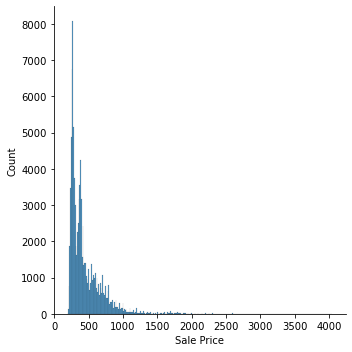

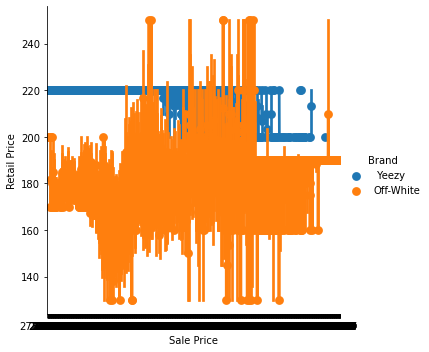

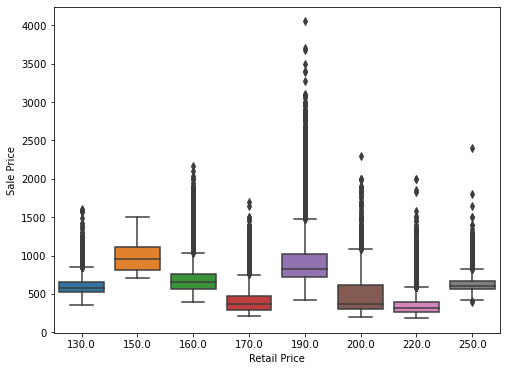

In [47]:
sns.displot(df["Sale Price"], kind="hist")
sns.factorplot('Sale Price','Retail Price',hue='Brand',data=df)
plt.show()
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Retail Price", y="Sale Price", data=df)

Eine weitere Untersuchung wäre bezüglich der Regionen interessant. 

Gibt es Unterschiede in Bezug auf durchschnittliche Verkaufspreise oder Schuhgrössen je nach Region? 
Als Durchschnitts-Methodik wird hier der simple Durchschnitt angewandt, eine weitere Möglichkeit wäre der Median.

Interessanterweise werden in Delaware die höchsten durchschnittlichen Preise bezahlt pro Sneaker-Paar und gleichzeitig ist die durchschnittliche Schuhgrösse mit c.a. US 8 am kleinsten.

In [35]:
df.groupby('Buyer Region')['Sale Price'].mean().sort_values(ascending=False).head()
df.groupby('Buyer Region')['Shoe Size'].mean().sort_values(ascending=False).tail()

Buyer Region
Delaware      503.335348
Hawaii        488.966057
Nevada        485.824051
California    478.248223
Oregon        469.550942
Name: Sale Price, dtype: float64

Buyer Region
Massachusetts    9.202894
California       9.186056
New York         9.069894
Oregon           8.167556
Delaware         8.163849
Name: Shoe Size, dtype: float64

Die Verteilung der jeweiligen numerischen Variabeln lässt sich auch separat noch in einer Gruppe darstellen.

<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

Text(0.5, 1.0, 'Sale Price')

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

Text(0.5, 1.0, 'Retail Price')

<AxesSubplot:xlabel='Shoe Size', ylabel='Density'>

Text(0.5, 1.0, 'Shoe Size')

<AxesSubplot:xlabel='PNL', ylabel='Density'>

Text(0.5, 1.0, 'PNL')

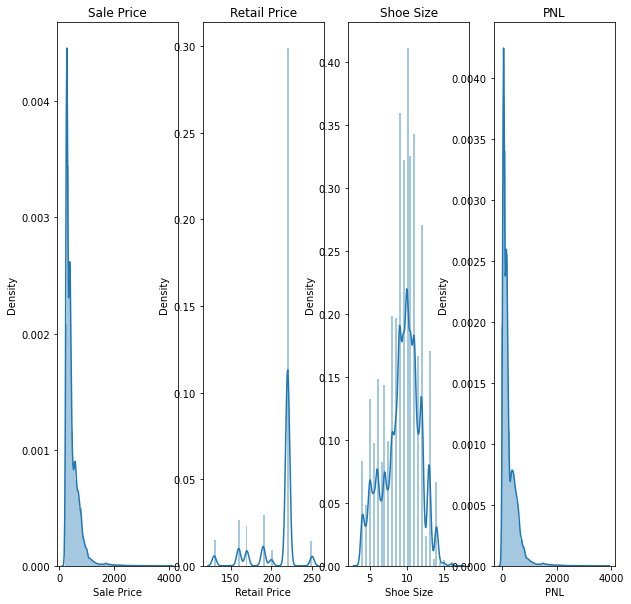

In [43]:
float_data = df[['Sale Price', 'Retail Price', 'Shoe Size', 'PNL']].copy()
fig, axes = plt.subplots(nrows = 1, ncols = 4)   
axes = axes.flatten()   
fig.set_size_inches(10, 10)

for ax, col in zip(axes, float_data.columns):
  sns.distplot(df[col], ax = ax)
  ax.set_title(col)

Man sieht direkt unter anderem, dass die Verteilungen teilweise schief sind, d.h. nicht symmetrisch. Hierzu überprüft man die visuelle Entdeckung via der Kurtosis und Schiefe Kennzahlen im nächsten Schritt.

In [46]:
df.kurtosis()
df.skew()

Sale Price      15.673043
Retail Price     1.925147
Shoe Size       -0.319641
PNL             13.919413
dtype: float64

Sale Price      3.030300
Retail Price   -1.569185
Shoe Size      -0.380606
PNL             2.852468
dtype: float64

Gibt es Unterschiede bezüglich des Gewinns per Schuhgrösse?

<AxesSubplot:xlabel='Shoe Size', ylabel='PNL'>

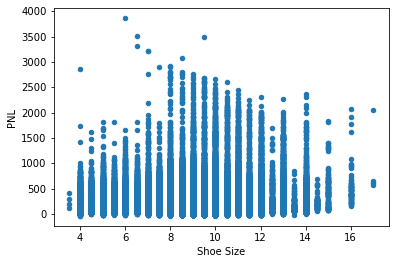

In [50]:
df.plot.scatter(x="Shoe Size", y="PNL")

Naheliegenderweise gehört auch eine Korrelationsanalyse zu einer EDA - hier sieht man beispielsweise, dass es keinen starken Zusammenhang gibt zwischen der Schuhgrösse und dem entsprechenden Gewinn oder Verlust pro Transaktion gibt.

<AxesSubplot:>

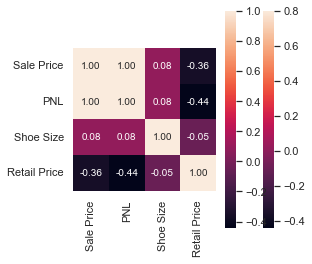

In [58]:
# Correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corrmat, vmax=.8, square=True);

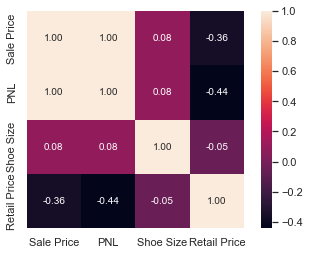

In [59]:
cols = corrmat.nlargest(k, 'Sale Price')['Sale Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

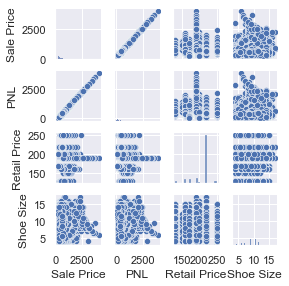

,Total,Percent
Order Date,0,0.0
Brand,0,0.0
Sneaker Name,0,0.0
Sale Price,0,0.0
Retail Price,0,0.0
Release Date,0,0.0
Shoe Size,0,0.0
Buyer Region,0,0.0
PNL,0,0.0
Age in Months,0,0.0


Um sicherzugehen, dass keine fehlenden Daten vorliegen, lässt sich mit dem folgenden Code überprüfen, ob es fehlende Daten gibt und wie die maximale Anzahl derer pro Spalte ist:

In [63]:
#dealing with missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Sale Price'].isnull()].index)
df.isnull().sum().max()

,Total,Percent
Order Date,0,0.0
Brand,0,0.0
Sneaker Name,0,0.0
Sale Price,0,0.0
Retail Price,0,0.0
Release Date,0,0.0
Shoe Size,0,0.0
Buyer Region,0,0.0
PNL,0,0.0


0

Ein Blick auf die Minima und Maxima der Verteilung von Sale Price lässt Ausreißer innerhalb der Daten erkennen: 

In [67]:
#standardizing data, checking for outliers
saleprice_scaled = StandardScaler().fit_transform(df['Sale Price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Minima der Verteilung von Sale Price:')
print(low_range)
print('Maxima der Verteilung von Sale Price:')
print(high_range)

Minima der Verteilung von Sale Price:
[[-1.01817754]
 [-1.00255142]
 [-0.99864489]
 [-0.9869253 ]
 [-0.98301877]
 [-0.98301877]
 [-0.98301877]
 [-0.96739265]
 [-0.96739265]
 [-0.96739265]]
Maxima der Verteilung von Sale Price:
[[10.30685353]
 [10.31076006]
 [10.36545148]
 [11.04909427]
 [11.52178442]
 [11.53741054]
 [11.92806356]
 [12.631239  ]
 [12.7093696 ]
 [14.07665518]]


Ist Sale Price Variable normalverteilt? Und wenn nicht, lässt sich die Verteilung von Sale Price der Normalverteilung gegenüberstellen? Die folgenden 2 Grafiken zeigen dies:

<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

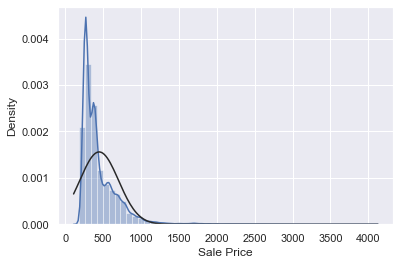

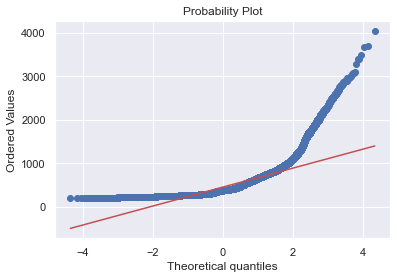

In [68]:
#histogram and normal probability plot
sns.distplot(df['Sale Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sale Price'], plot=plt)

Da es sich um klar ersichtlich nicht um eine Normalverteilung handelt, würde eine Log-Transformation zu einer Normalverteilung der Variable führen?

<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

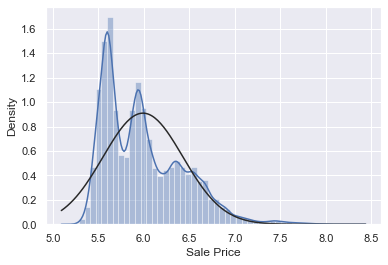

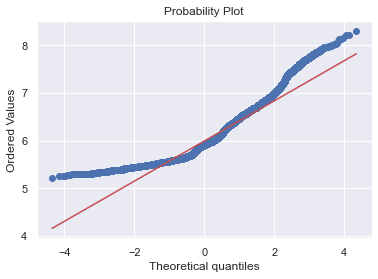

In [69]:
df['Sale Price'] = np.log(df['Sale Price'])
sns.distplot(df['Sale Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sale Price'], plot=plt)

Der folgende Schritt ist eher eine Vorwegnahme des zweiten Projekts; hier werden Scheinvariablen für kategorische Variabeln erstellt, um sie beispielsweise in linearen Regressionen zu nutzen:

In [70]:
#convert categorical variable into dummy
df = pd.get_dummies(df)
df

,Order Date,Sale Price,Retail Price,Release Date,Shoe Size,PNL,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,...,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
0,2017-09-01,7.000334,220.0,2016-09-24,11.0,877.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-09-01,6.529419,220.0,2016-11-23,11.0,465.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-01,6.536692,220.0,2016-11-23,11.0,470.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-09-01,6.980076,220.0,2016-11-23,11.5,855.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-09-01,6.719013,220.0,2017-02-11,11.0,608.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,6.336826,220.0,2018-12-26,8.0,345.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,2019-02-13,6.393591,220.0,2018-12-26,8.5,378.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,2019-02-13,6.405228,220.0,2018-12-26,5.5,385.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,2019-02-13,6.476972,220.0,2018-12-26,11.0,430.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
